In [1]:
from acquire_zillow import *
from prepare_zillow import *
import env


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# image stuff
from IPython.display import display
from PIL import Image

# Wrangling
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D


# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Started out trying to error check my daisy-chained acquire/prep functions and realized the magic of simple print statements
* They made it easy for me to see where the countless mistakes were
* This started out with just simple function name but turned into something much more magical
* Zillow image, because my defense mechinism is pretending to be extra

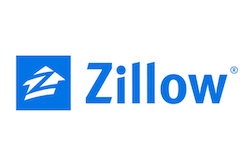

Detected zillow_data.csv - use csv (1) or gather new data (2)? 1
--- Beginning CSV Import --

--- CSV Import Complete --

Shape of DataFrame: (167854, 59)


In [3]:
df = single_units(acquire_zillow())
df = zillow_data_prep(df, cols_to_remove=[], prop_required_column=.95,
                      prop_required_row=.95)

In [4]:
df.dropna(inplace=True)
df.drop(columns=(['finishedsquarefeet12', 'fips', 'calculatedbathnbr',
                  'fullbathcnt', 'propertycountylandusecode',
                  'propertyzoningdesc', 'rawcensustractandblock',
                  'structuretaxvaluedollarcnt', 'censustractandblock',
                  'heatingorsystemdesc', 'propertylandusedesc', 'roomcnt']), inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(72930, 19)

In [5]:
df2 = df[['logerror', 'taxvaluedollarcnt', 'taxamount']]

### Here's the code for all of it

In [6]:
import env
import pandas as pd
from IPython.display import display
from PIL import Image
import os.path
from pathlib import Path

DATA_FILE = Path('zillow_data.csv')

def merge_zillow():
    print('--- Gathering 2016 Zillow Data ---')
    df1 = get_2016_zillow()
    print('--- Gathering 2017 Zillow Data ---')
    df2 = get_2017_zillow()
    print('--- Merging 2016 and 2017 Zillow Data ---')
    return df1.append(df2, ignore_index=True)

def drop_columns(df):
    print('--- Dropping null latitude/longitude rows ---')
    df = df[~df.longitude.isnull() | ~df.latitude.isnull()]
    print('--- Dropping id columns ---')
    return df.drop(columns=([\
        'airconditioningtypeid', 'architecturalstyletypeid',\
        'buildingclasstypeid', 'buildingqualitytypeid',
        'decktypeid', 'heatingorsystemtypeid', 'propertylandusetypeid',\
        'storytypeid', 'typeconstructiontypeid'\
    ]))


def acquire_zillow():
    pil_im = Image.open('welcome.png')
    display(pil_im)
    if DATA_FILE.is_file():
        data_type = input(f'Detected {DATA_FILE} - use csv (1) or gather new data (2)? ')
        if data_type == '1':
            print('--- Beginning CSV Import --\n')
            df = pd.read_csv('zillow_data.csv')
            print('--- CSV Import Complete --\n')
            print(f'Shape of DataFrame: {df.shape}')
            return df
        else:
            print('--- Beginning Zillow Data Collection ---')
            df = merge_zillow()
            df = drop_columns(df)
            print('--- Writing to \'zillow_data.csv\' ---')
            df.to_csv('zillow_data.csv', index=False)
            print('--- Data Collection Complete --\n')
            print(f'Shape of DataFrame: {df.shape}')
            return df
    else:
        print('--- Beginning Zillow Data Collection ---')
        df = merge_zillow()
        df = drop_columns(df)
        print('--- Writing to \'zillow_data.csv\' ---')
        df.to_csv('zillow_data.csv', index=False)
        print('--- Data Collection Complete --\n')
        print(f'Shape of DataFrame: {df.shape}')
        return df

##### Probably the most time saving part of all of this was creating the option to use the csv if it was present in the path

### How to make the prettier heatmaps

#### We've all used the regular heatmaps that are a huge block of noise so I set out to figure out how to make the nicer looking ones
#### Here is an example of a clunky looking heatmap

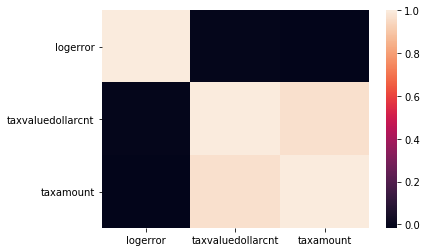

In [8]:
sns.heatmap(df2.corr())

#### Here is the new and improved heatmap with label and annotation size improvements added

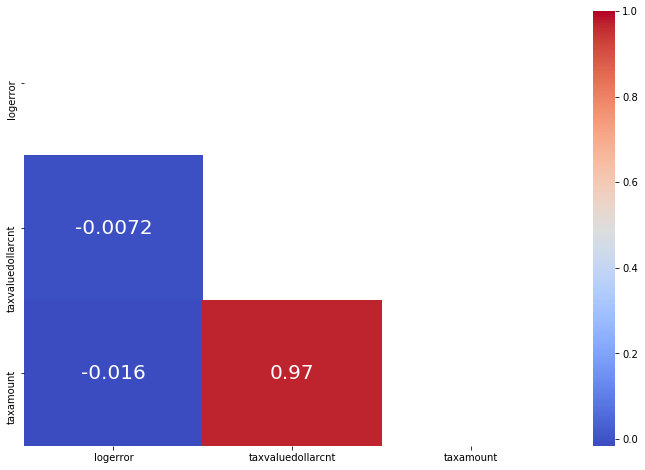

In [9]:
def heatmap_plot(cols):
    fig, ax = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(df2[cols].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df2[cols].corr(), annot=True, ax=ax, cmap='coolwarm',
                annot_kws={"size": 20}, mask=mask)
    ax.tick_params(labelsize=10)

heatmap_plot(['logerror', 'taxvaluedollarcnt', 'taxamount'])

#### I do not know why it takes this much, but that's what it is

#### Seaborn documentation here: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### Obligatory pairplot

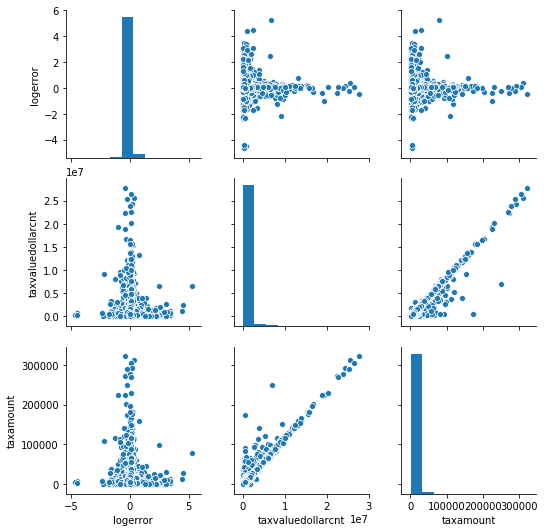

In [10]:
sns.pairplot(df2)